In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge

**Import Data**

In [22]:
df_diamonds = pd.read_csv(r"C:\Users\User\Downloads\diamonds.csv\diamonds.csv")

In [23]:
df_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploratory Analysis

In [24]:
#Check data types
df_diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [25]:
#check for null values
df_diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [26]:
#check for duplicates
df_diamonds.duplicated().sum()

np.int64(0)

In [27]:
df_diamonds.dropna()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


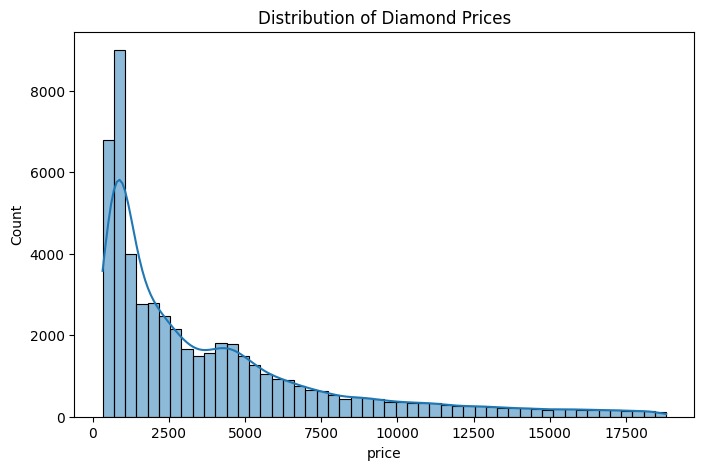

In [28]:
#Distribution of diamond prices using a histogram
plt.figure(figsize=(8,5))
sns.histplot(df_diamonds['price'], bins=50, kde=True)
plt.title('Distribution of Diamond Prices')
plt.show()

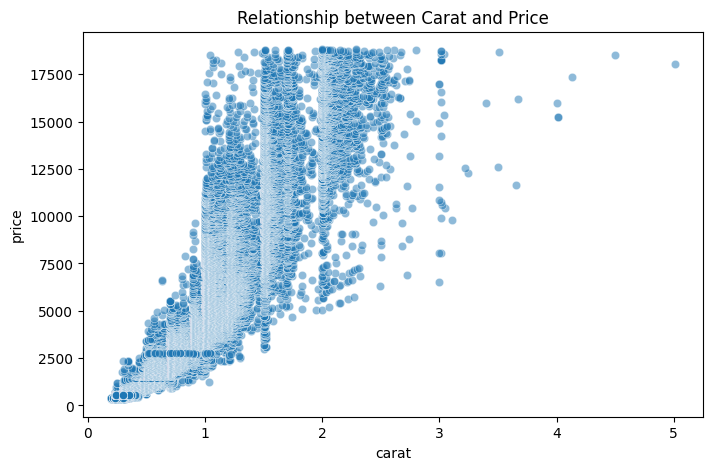

In [29]:
# Insight 2: Relationship between carat and price
plt.figure(figsize=(8,5))
sns.scatterplot(x='carat', y='price', data=df_diamonds, alpha=0.5)
plt.title('Relationship between Carat and Price')
plt.show()

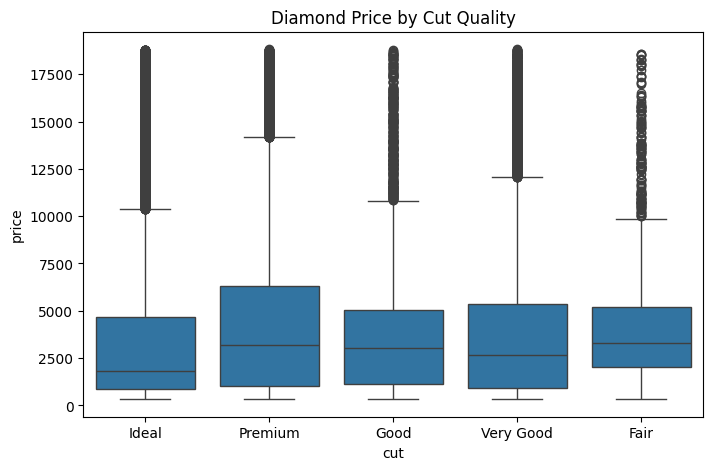

In [31]:
# 3. Relationship between cut and price using a boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='cut', y='price', data=df_diamonds)
plt.title('Diamond Price by Cut Quality')
plt.show()

**Insights from Exploratory Data Analysis**

1.Histogram

The diamonds in the dataset are mostly on the cheaper side and only a few are very expensive that means that high priced diamonds are rare, showing a right skewed distribution.

2.Scatter Plot

There is a strong positive realtionship between carat and price hence larger diamonds tends to cost more. As the carat increases, the price tend to rise significantly.

3.Box Plot

The plot shows that diamonds with premium and ideal cuts tend to be priced lower than other cut types.

In [32]:
#Creating a random sample with 12500 records
diamonds_model = df_diamonds.sample(n=12500, random_state=42)

In [33]:
diamonds_model.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
1388,1389,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,50053,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,41646,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,42378,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,17245,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [34]:
diamonds_model.shape

(12500, 11)

In [35]:
#Question 3
#converting the data into numbers
diamonds_encoded = pd.get_dummies(diamonds_model, drop_first=True)

#Defining input X and output Y
X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

#Spliting into training and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating and training the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#Predicting the diamond prices using the training model
y_pred = lr.predict(X_test)

#Evaluating the models performance
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("R2 score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.9236528243496825
Root Mean Squared Error: 1100.4094457272447


In [36]:
#Question 4
# Select continuous variables
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Standardize the data
scaler = StandardScaler()
scaled = scaler.fit_transform(diamonds_model[numeric_features])

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled)

# Create new DataFrame for PCA features and price
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['price'] = diamonds_model['price'].values

# Split into train sets
X_pca = pca_df[['PC1', 'PC2']]
y_pca = pca_df['price']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Fit Linear Regression on the PCA data
pca_lr = LinearRegression()
pca_lr.fit(X_train_pca, y_train_pca)

# Predict and evaluate model performance
y_pred_pca = pca_lr.predict(X_test_pca)
print("PCA Model R²:", r2_score(y_test_pca, y_pred_pca))
print("PCA Model RMSE:", np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)))

PCA Model R²: 0.8055772996058582
PCA Model RMSE: 1756.027477562555


In [40]:
# Lasso Regression
lasso = Lasso(alpha=0.1, random_state=42, max_iter = 10000)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate both models
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#Display results
print("\nModel Comparison Summary:")
print("Lasso R²:", r2_lasso)
print("Lasso RMSE:", rmse_lasso)
print("Ridge R²:", r2_ridge)
print("Ridge RMSE:", rmse_ridge)



Model Comparison Summary:
Lasso R²: 0.9236255165830303
Lasso RMSE: 1100.6062247014047
Ridge R²: 0.9234317379061593
Ridge RMSE: 1102.0015788769488


In [41]:
#Question 6
# Create a DataFrame comparing the performance of all models
comparison = pd.DataFrame({
    'Model': ['Linear Regression (Full)', 'PCA Regression (2 Features)',
              'Lasso Regression', 'Ridge Regression'],
    'R² Score': [r2_score(y_test, y_pred), r2_score(y_test_pca, y_pred_pca),
                 r2_lasso, r2_ridge],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)),
             np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)),
             rmse_lasso,
             rmse_ridge]
})

# Display the comparison table
print(comparison)

                         Model  R² Score         RMSE
0     Linear Regression (Full)  0.923653  1100.409446
1  PCA Regression (2 Features)  0.805577  1756.027478
2             Lasso Regression  0.923626  1100.606225
3             Ridge Regression  0.923432  1102.001579


**Interpretation:**
The Full Linear Regression model achieved the highest accuracy.This indicates 
that it explains most of the variation in diamond prices since it uses all 
available features.

The PCA Regression model performed lower because dimensionality
reduction to only two components caused a loss of important information.

Lasso and Ridge Regression models produced results very similar to the full Linear model,
showing that regularization did not significantly improve performance since there were
no serious multicollinearity or overfitting issues.

Overall, the Linear Regression (Full) model demonstrated the highest accuracy among all models.

**Group photo**

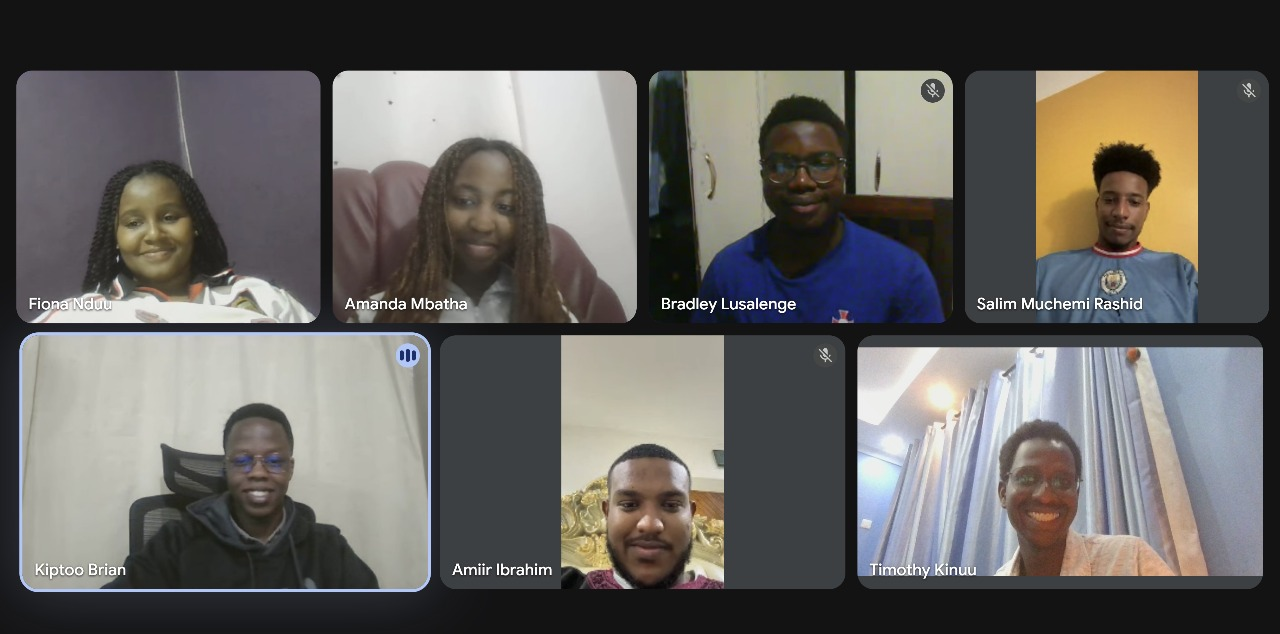